In [25]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

In [26]:
train = pd.read_csv("C:\\users\\jason\\projects\\titantic\\data\\train.csv")

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [80]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
train.groupby(['Survived']).describe().unstack()

               Survived
Age     count  0           424.000000
               1           290.000000
        mean   0            30.626179
               1            28.343690
        std    0            14.172110
               1            14.950952
        min    0             1.000000
               1             0.420000
        25%    0            21.000000
               1            19.000000
        50%    0            28.000000
               1            28.000000
        75%    0            39.000000
               1            36.000000
        max    0            74.000000
               1            80.000000
Fare    count  0           549.000000
               1           342.000000
        mean   0            22.117887
               1            48.395408
        std    0            31.388207
               1            66.596998
        min    0             0.000000
               1             0.000000
        25%    0             7.854200
               1          

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [96]:
train.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [99]:
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [29]:
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,7
Categorical,4
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


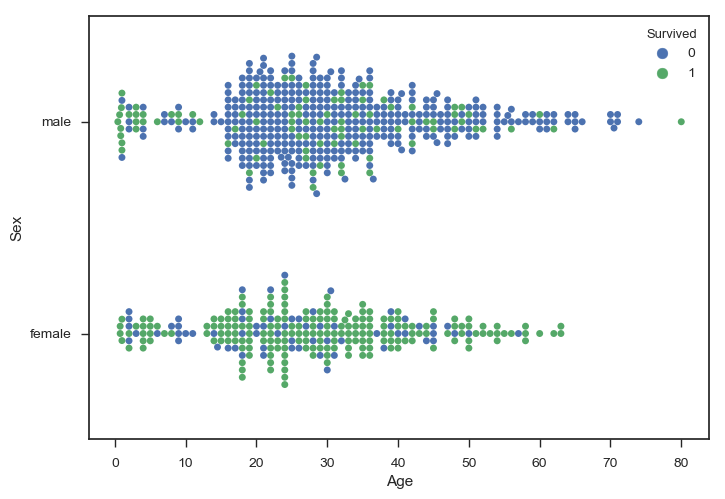

In [95]:
sns.swarmplot(x="Age", y="Sex", hue="Survived", data=train)

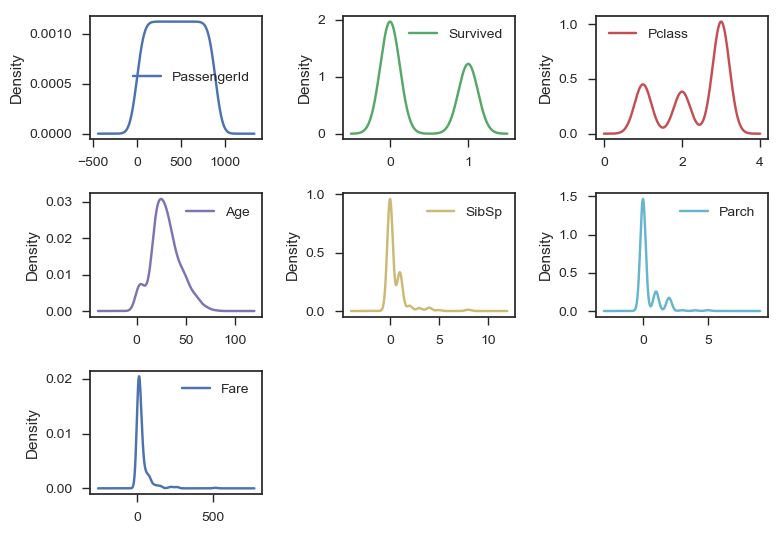

In [66]:
train.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()

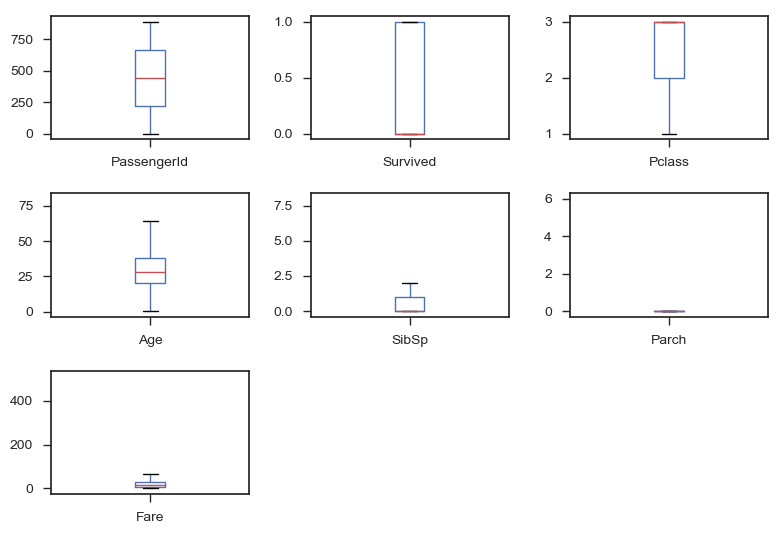

In [64]:
train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()

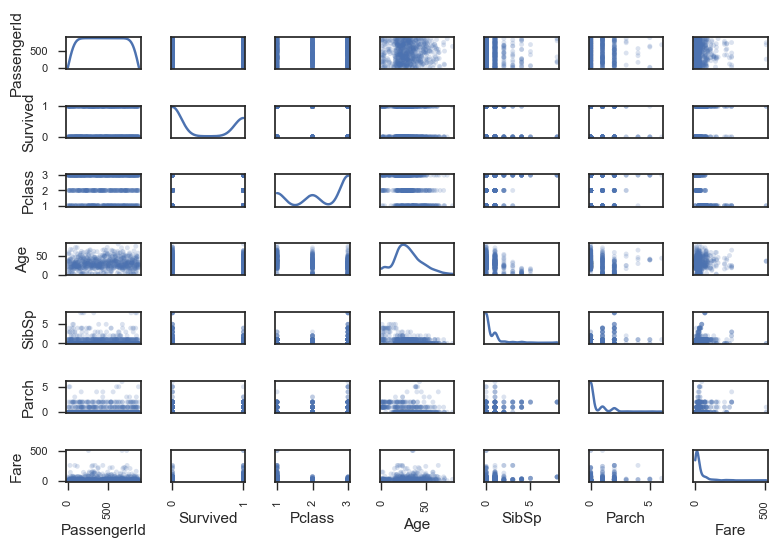

In [75]:
scatter_matrix(train, alpha=0.2, diagonal='kde')
plt.tight_layout()

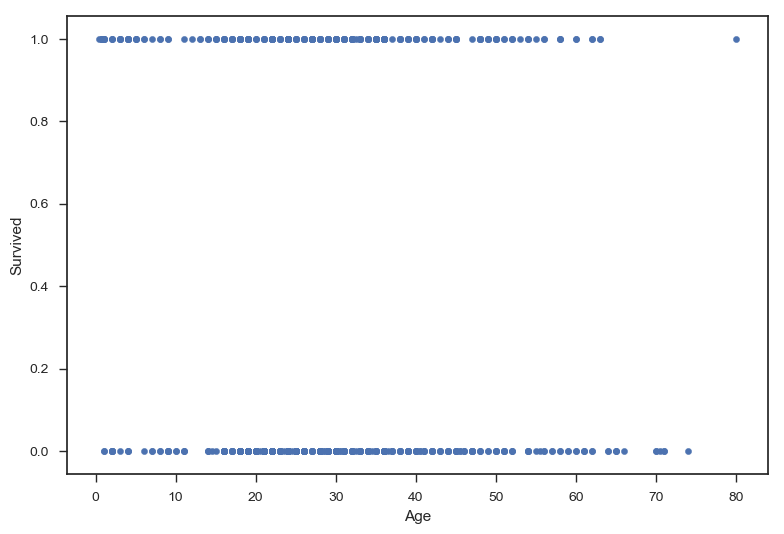

In [77]:
train.plot.scatter(x='Age', y='Survived')
plt.tight_layout()

In [98]:
train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


[Text(0,0.5,'Fare'),
 Text(0,1.5,'Parch'),
 Text(0,2.5,'SibSp'),
 Text(0,3.5,'Age'),
 Text(0,4.5,'Pclass'),
 Text(0,5.5,'Survived'),
 Text(0,6.5,'PassengerId')]

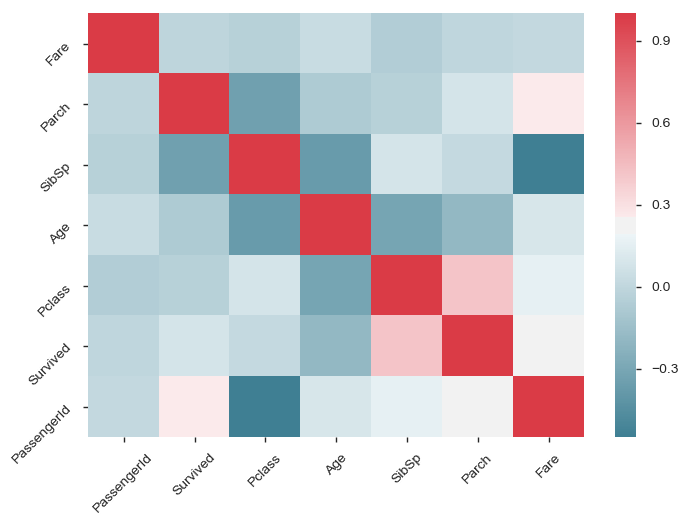

In [30]:
corr = train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corrmap = sns.heatmap(corr, cmap=cmap,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
loc, labels = plt.xticks()
corrmap.set_xticklabels(labels, rotation=45)
corrmap.set_yticklabels(labels[::-1], rotation=45) 

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


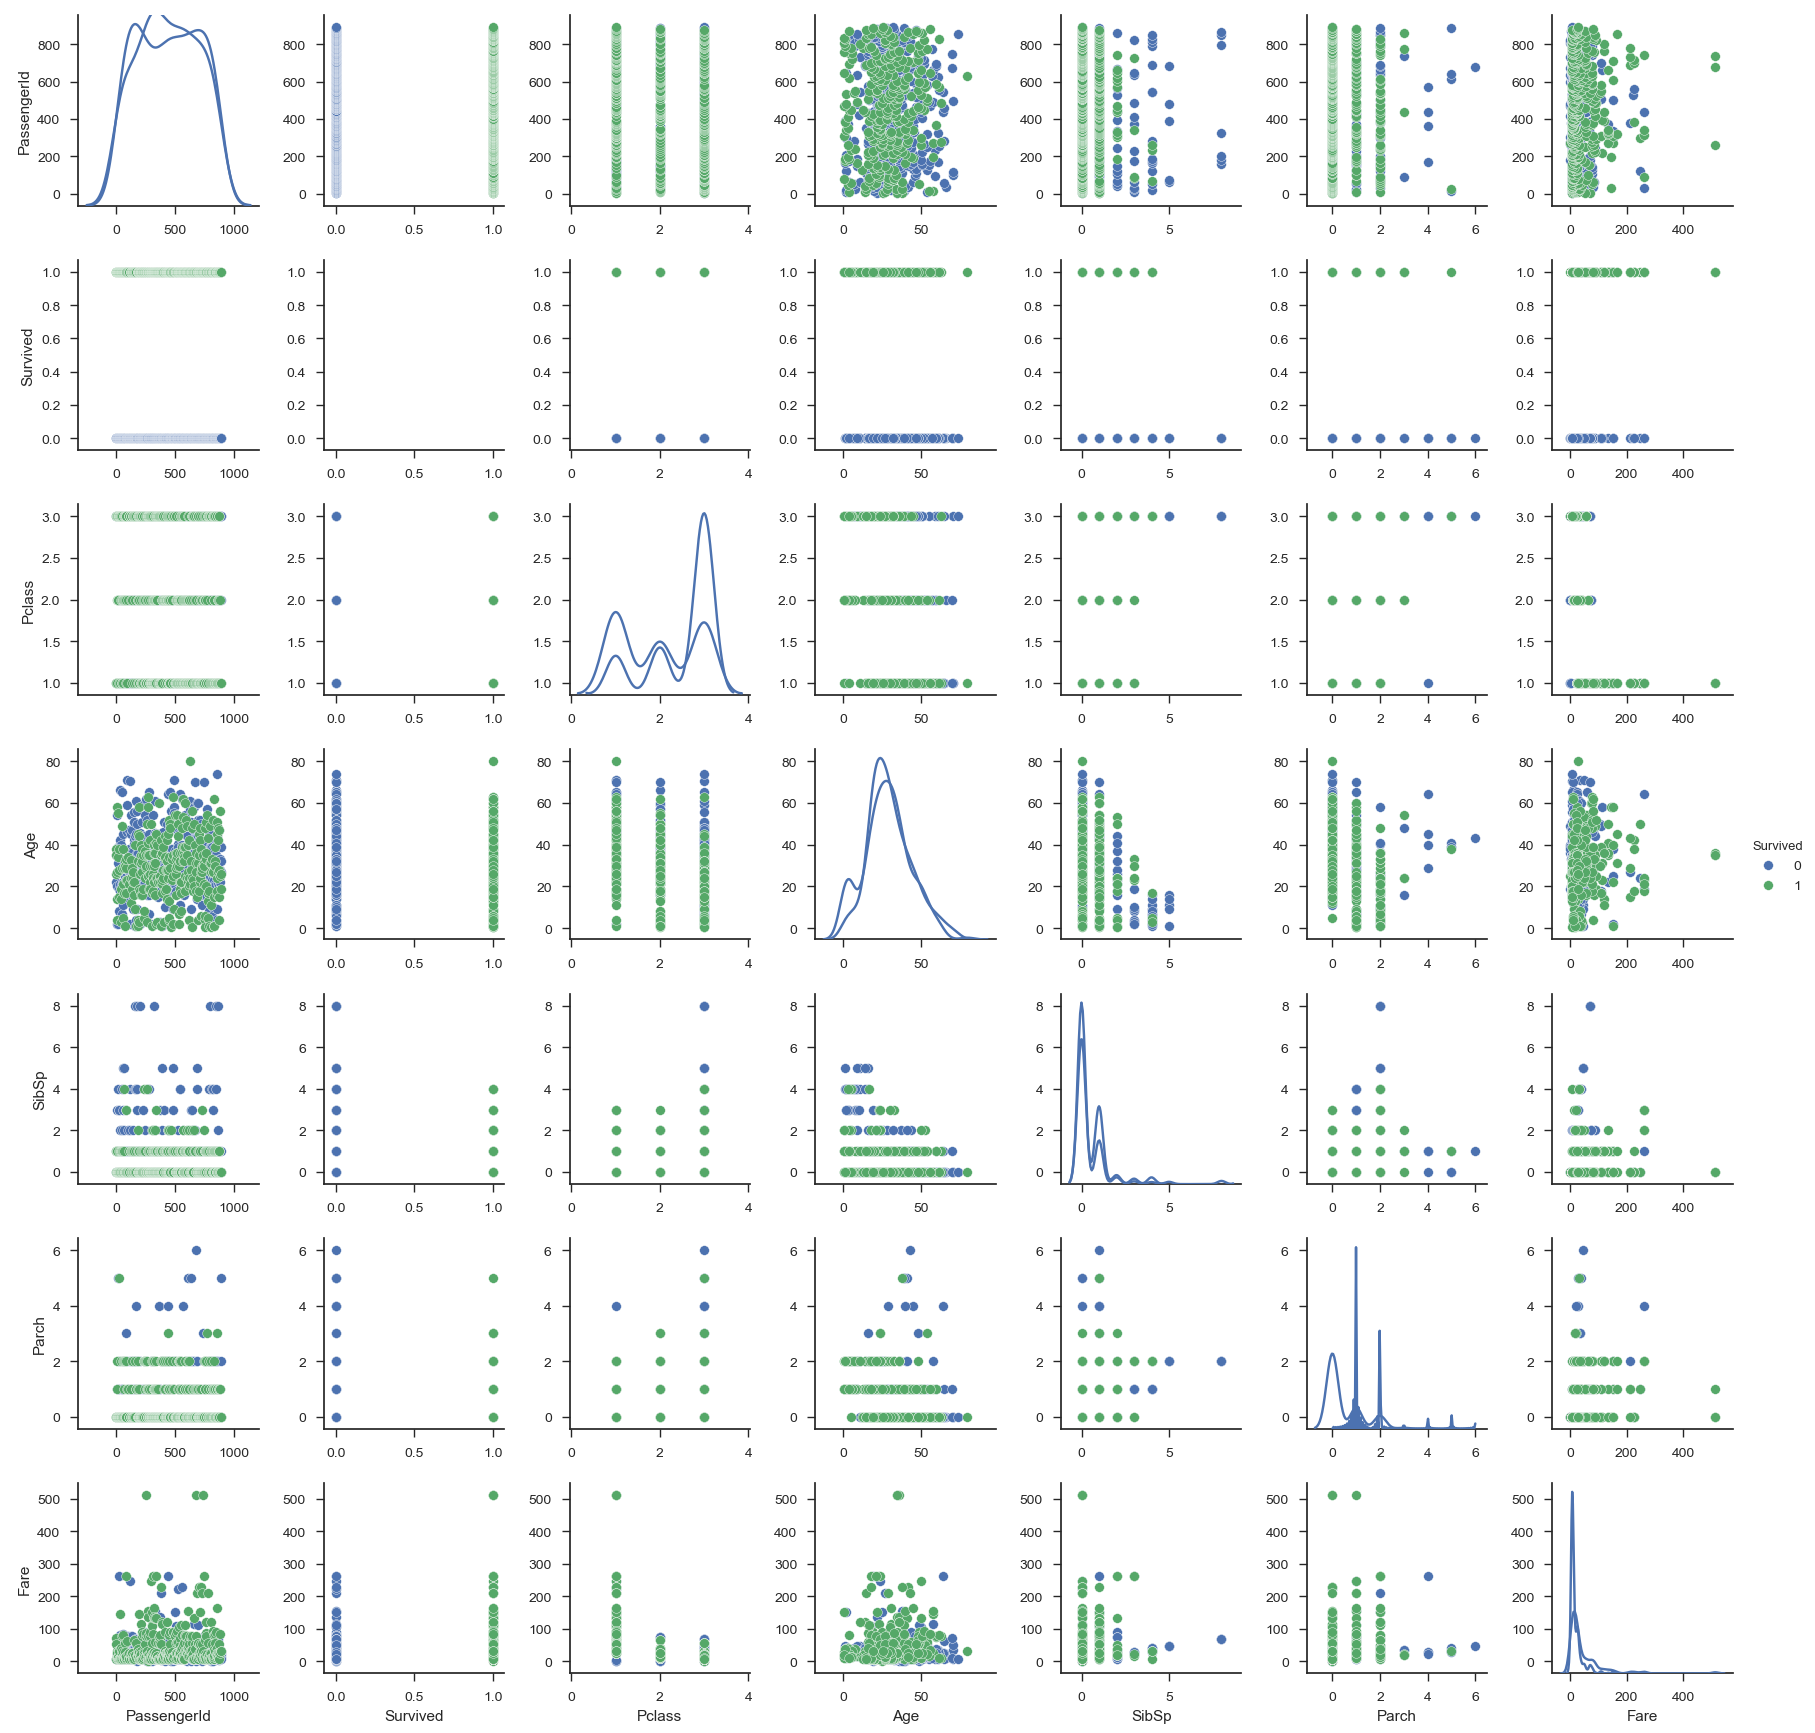

In [105]:
sns.set(style="ticks")
sns.pairplot(train_no_string, hue="Survived", dropna  = True, diag_kind  = 'kde')